# Kalman filter example demo in Python

A Python implementation of the example given in pages 11-15 of "An
Introduction to the Kalman Filter" by Greg Welch and Gary Bishop,
University of North Carolina at Chapel Hill, Department of Computer
Science, TR 95-041,
http://www.cs.unc.edu/~welch/kalman/kalmanIntro.html
by Andrew D. Straw
http://wiki.scipy.org/Cookbook/KalmanFiltering

In [1]:
import numpy
import pylab
%matplotlib inline

In [2]:
# intial parameters
n_iter = 50
sz = (n_iter,) # size of array
x = -0.37727 # truth value (typo in example at top of p. 13 calls this z)
# observations (normal about x, sigma=0.1)
z = numpy.random.normal(x,0.1,size=sz)

In [3]:
Q = 1e-5 # process variance

# allocate space for arrays
xhat=numpy.zeros(sz)      # a posteri estimate of x
P=numpy.zeros(sz)         # a posteri error estimate
xhatminus=numpy.zeros(sz) # a priori estimate of x
Pminus=numpy.zeros(sz)    # a priori error estimate
K=numpy.zeros(sz)         # gain or blending factor

R = 0.1**2 # estimate of measurement variance, change to see effect

# intial guesses
xhat[0] = 0.0
P[0] = 1.0

for k in range(1,n_iter):
    # time update
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1]+Q

    # measurement update
    K[k] = Pminus[k]/( Pminus[k]+R )
    xhat[k] = xhatminus[k]+K[k]*(z[k]-xhatminus[k])
    P[k] = (1-K[k])*Pminus[k]

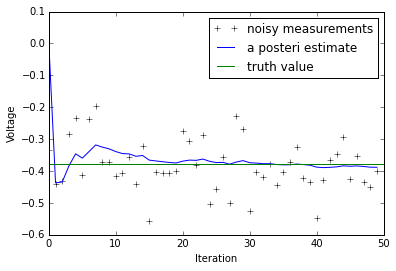

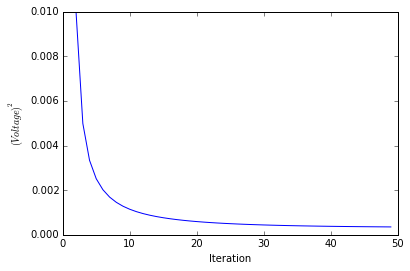

In [4]:
pylab.figure()
pylab.plot(z,'k+',label='noisy measurements')
pylab.plot(xhat,'b-',label='a posteri estimate')
pylab.axhline(x,color='g',label='truth value')
pylab.legend()
pylab.xlabel('Iteration')
pylab.ylabel('Voltage')

pylab.figure()
valid_iter = range(1,n_iter) # Pminus not valid at step 0
pylab.plot(valid_iter,Pminus[valid_iter],label='a priori error estimate')
pylab.xlabel('Iteration')
pylab.ylabel('$(Voltage)^2$')
pylab.setp(pylab.gca(),'ylim',[0,.01])
pylab.show()